# Finding similar image & visualization
AIFFEL 대전 탐색 노드 7   
자신 사진과 비슷한 사진을 찾고, 시각화하는 프로젝트이다.

프로세스는 다음과 같다.     
1. Import package 
2. Data preprocessing 
3. Data embedding
4. Comparing images
5. Visualization

## 1. Import package

In [1]:
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

## 2. Data preprocessing
- Check the face recognition
- Data list

### Check the face recognition

[(98, 758, 284, 572)]


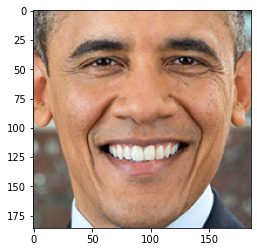

In [2]:
# chek the face recognition
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/obama.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

In [3]:
# face cropping
def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    if len(face_locations) > 0:
        a, b, c, d = face_locations[0]
        cropped_face = image[a:c,d:b,:]
        return cropped_face
    else:
        return []

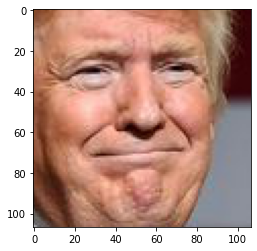

In [4]:
# test
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/trump.jpg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

### Data list

In [5]:
# data list
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'
file_list = os.listdir(dir_path)
print ("file_list: {}".format(file_list))

file_list: ['안도규.jpeg', '유퉁.jpeg', '남다름.jpeg', '김윤석.jpeg', '박정철.jpeg', '윤주상.jpeg', '유순철.jpeg', '이선균.jpeg', '문오장.jpeg', '김민석.jpeg', '서지훈.jpeg', '이진욱.jpeg', '김형민.jpeg', '류승범.jpeg', '김정태.jpeg', '고세원.jpeg', '강하늘.jpeg', '이재룡.jpeg', '이동건.jpeg', '김승우.jpeg', '기주봉.jpeg', '강승원.jpeg', '손호준.jpeg', '김기두.jpeg', '신현준.jpeg', '김현빈.jpeg', '신동우.jpeg', '이수혁.jpeg', '이주안.jpeg', '안재홍.jpeg', '이준.jpeg', '김상중.jpeg', '박진우_73.jpeg', '윤희석.jpeg', '김명곤.jpeg', '소지섭.jpeg', '김호진.jpeg', '윤봉길.jpeg', '이준기.jpeg', '김명준.jpeg', '서배준.png', '이시언.jpeg', '이종현.jpeg', '강이석.png', '임하룡.jpeg', '김태우.jpeg', '신하균.jpeg', '김병옥.jpeg', '이계인.jpeg', '이승준.jpeg', '공정환.jpeg', '김민재_1979.jpeg', '김정훈.jpeg', '마동석.jpeg', '이완.jpeg', '김태훈.jpeg', '인교진.jpeg', '양택조.gif', '배용준.jpeg', '권율.jpeg', '고창석.jpeg', '유해진.jpeg', '신성록.jpeg', '오의식.jpeg', '김단율.jpeg', '박신우.jpeg', '류진.jpeg', '이준영.jpeg', '김정현_1990.jpeg', '안재모.jpeg', '김정현.jpeg', '김강우.jpeg', '박민우.jpeg', '손종학.jpeg', '권상우.jpeg', '박찬환.png', '김다현.jpeg', '우도환.jpeg', '엄태구.jpeg', '강석우.jpeg', '김승수.jpeg', '남경읍', '김정민.

## 3. Data embedding
- Embedding test
- Embedding

### Embedding test

In [6]:
# embedding test
image_file = os.path.join(dir_path, 'obama.jpg')
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.08126248,  0.11014761, -0.01082448, -0.05268792,  0.01033717,
        -0.00813808, -0.07251769, -0.0922646 ,  0.19304723, -0.09246384,
         0.23908533,  0.06770287, -0.22123125, -0.14119367,  0.05562152,
         0.13705511, -0.17924425, -0.07232306, -0.11183281, -0.11370818,
         0.03956435, -0.01019115,  0.0942178 ,  0.04493114, -0.12757549,
        -0.34449592, -0.05374938, -0.17703305,  0.00868226, -0.09721592,
        -0.09817187,  0.00278232, -0.17721367, -0.12789807,  0.03489833,
        -0.01991234, -0.00838933, -0.00132862,  0.18308581,  0.02447568,
        -0.1237656 ,  0.09957044,  0.02323568,  0.22983313,  0.2838524 ,
         0.06655717, -0.00558912, -0.09833544,  0.10058986, -0.23476946,
         0.06006292,  0.1341591 ,  0.08373027,  0.03900504,  0.10194533,
        -0.19337648,  0.01717628,  0.08978969, -0.16005114,  0.01892098,
         0.03082444, -0.06051281, -0.04526773,  0.04633342,  0.20678686,
         0.10299795, -0.12437531, -0.0490516 ,  0.1

### Embedding

In [7]:
# image embedding
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        if len(face) > 0:
            embedding = get_face_embedding(face)
            if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
                embedding_dict[os.path.splitext(file)[0]] = embedding[0]
    return embedding_dict

In [8]:
embedding_dict = get_face_embedding_dict(dir_path)
print(len(embedding_dict))
embedding_dict['trump']

407


array([-0.15962467,  0.20268655,  0.0323635 ,  0.02439232, -0.06226439,
        0.05140705,  0.07351795, -0.16823348,  0.06962204, -0.05557961,
        0.17270109, -0.05094168, -0.35293093, -0.0316438 ,  0.03792984,
        0.17343847, -0.13260126, -0.15357377, -0.23523533, -0.08442692,
       -0.00134139,  0.03210667, -0.08926154, -0.02670781, -0.09581181,
       -0.25792354, -0.01056999, -0.11071672,  0.03133569, -0.07444921,
        0.05670552, -0.02273796, -0.19461137, -0.04576054,  0.00947582,
        0.01806056, -0.1502624 , -0.07787319,  0.17577608,  0.01933258,
       -0.19744575, -0.03930519,  0.07374467,  0.20196027,  0.1476755 ,
       -0.0141539 ,  0.0172476 , -0.11976205,  0.09462971, -0.24318144,
       -0.02755127,  0.12169892,  0.14837705,  0.17079785,  0.06952555,
       -0.15360466,  0.02005427,  0.08199155, -0.19544823,  0.10653654,
        0.11468476, -0.21902837, -0.07677591, -0.06791042,  0.10587606,
        0.05921567, -0.06115703, -0.11171092,  0.23917492, -0.15

## 4. Comparing images
- Distance test
- Nearest image

### Distance test

In [9]:
# distance test
A = np.array([0.0019173615146428347, 0.17689529061317444, 0.0763588473200798, -0.024574430659413338, -0.13141091167926788, 0.0344821996986866, -0.0374063216149807, -0.07056370377540588, 0.048655178397893906, -0.03414120525121689, 0.22696012258529663, -0.061402369290590286, -0.24329672753810883, -0.039421431720256805, 0.0621466189622879, 0.1220191940665245, -0.1616966724395752, -0.06176016479730606, -0.18894734978675842, -0.06051916256546974, -0.010404378175735474, -0.05918719246983528, 0.02205268107354641, -0.06932859122753143, -0.20260301232337952, -0.2425234317779541, -0.04454419016838074, -0.11400106549263, -0.02022719383239746, -0.15134216845035553, 0.07622595876455307, -0.0323314443230629, -0.1404413878917694, -0.056338660418987274, -0.04520038887858391, -0.026131991297006607, -0.0352761372923851, -0.0679447203874588, 0.1318240910768509, 0.034210119396448135, -0.17475582659244537, 0.13853909075260162, -0.0027398746460676193, 0.227312833070755, 0.3029572069644928, 0.004932125099003315, 0.05853061378002167, -0.07521739602088928, 0.1443275809288025, -0.2340908795595169, 0.030092637985944748, 0.040133409202098846, 0.1672351360321045, 0.05728958174586296, 0.11475440859794617, -0.07548368722200394, 0.040267568081617355, 0.16487033665180206, -0.21067440509796143, 0.036163005977869034, 0.051559075713157654, -0.05994952470064163, 0.029524143785238266, -0.04122130945324898, 0.13074155151844025, 0.1142958477139473, -0.00561982998624444, -0.09740489721298218, 0.18533651530742645, -0.10422169417142868, -0.11409182846546173, 0.02283927984535694, -0.08339140564203262, -0.13673236966133118, -0.3275497853755951, -0.0002689119428396225, 0.2842463254928589, 0.13883619010448456, -0.29149484634399414, -0.07276060432195663, -0.03179163485765457, 0.011192545294761658, 0.03802505508065224, 0.03392524644732475, -0.03972085565328598, -0.12013585865497589, -0.06272879987955093, -0.026893358677625656, 0.2430601865053177, -0.12022019177675247, -0.010466678068041801, 0.20199882984161377, 0.051095910370349884, -0.13243277370929718, 0.06056740880012512, -0.04802423343062401, -0.12318279594182968, -0.013157366774976254, -0.12076889723539352, -0.07183175534009933, -0.01982908323407173, -0.15032584965229034, -0.026652328670024872, 0.06820419430732727, -0.24668177962303162, 0.1818322390317917, -0.01959969662129879, -0.07208395004272461, -0.0680316612124443, -0.038368165493011475, 0.021410271525382996, 0.06388168036937714, 0.2293335199356079, -0.22541724145412445, 0.19133104383945465, 0.24343697726726532, -0.04034627974033356, 0.07534503191709518, 0.017645064741373062, 0.054646339267492294, -0.046512290835380554, 0.07076910138130188, -0.0960201621055603, -0.12610889971256256, -0.017934376373887062, -0.010262779891490936, 0.01885927841067314, 0.057148948311805725])
B = np.array([-0.08116298168897629, 0.1283080279827118, 0.024102725088596344, -0.03748808428645134, 0.06578215956687927, -0.07137967646121979, -0.10578329861164093, -0.0911930501461029, 0.19589228928089142, -0.09603863954544067, 0.2447616308927536, 0.07736924290657043, -0.17048686742782593, -0.1277867704629898, 0.06390697509050369, 0.12272421270608902, -0.19242052733898163, -0.08341517299413681, -0.11065894365310669, -0.09501136839389801, -0.010332206264138222, -0.008188878186047077, 0.08251037448644638, 0.04358505830168724, -0.1455313265323639, -0.3595622479915619, -0.07877802848815918, -0.18927346169948578, -0.0018955999985337257, -0.06280332803726196, -0.06073163449764252, 0.03181075677275658, -0.15109844505786896, -0.08682074397802353, 0.017340943217277527, -0.020879391580820084, 0.008258359506726265, 0.016738882288336754, 0.16803768277168274, 0.039162665605545044, -0.09613757580518723, 0.06231086328625679, 0.00924085732549429, 0.2418847680091858, 0.26051488518714905, 0.07355985790491104, 0.05239278823137283, -0.08052310347557068, 0.08884726464748383, -0.24261267483234406, 0.05618546903133392, 0.12175332009792328, 0.09056758135557175, 0.04266638681292534, 0.16591356694698334, -0.2005864679813385, 0.01018378883600235, 0.08819808065891266, -0.15550008416175842, 0.0815843716263771, 0.03018287755548954, -0.025435002520680428, -0.06714558601379395, 0.009693139232695103, 0.22243273258209229, 0.13470745086669922, -0.1363328993320465, 0.01635543815791607, 0.18212205171585083, -0.03392908349633217, 0.0398673489689827, 0.0043264636769890785, -0.15493592619895935, -0.2530894875526428, -0.23155181109905243, 0.0678660124540329, 0.31580865383148193, 0.21846994757652283, -0.20842058956623077, 0.012199334800243378, -0.12194785475730896, 0.059383176267147064, 0.0768171101808548, -0.012840969488024712, -0.11975857615470886, -0.11892750859260559, -0.03087366186082363, 0.04432998597621918, 0.09186872839927673, 0.0821407362818718, -0.018520792946219444, 0.1962793618440628, -0.0566205158829689, 0.026071354746818542, 0.007139421068131924, 0.02185123600065708, -0.11292634904384613, -0.044381096959114075, -0.18024618923664093, -0.007845945656299591, 0.010368190705776215, -0.07480168342590332, -0.0035089245066046715, 0.09972234815359116, -0.18773995339870453, 0.0474785715341568, 0.025760797783732414, -0.042169712483882904, 0.0014017894864082336, 0.1201503798365593, -0.05088714882731438, -0.02051539719104767, 0.0884844958782196, -0.2176845818758011, 0.25695914030075073, 0.23358485102653503, 0.019985560327768326, 0.17838242650032043, 0.029055196791887283, 0.04518195986747742, -0.044122979044914246, -0.043431997299194336, -0.15906637907028198, -0.07155231386423111, 0.02525237947702408, 0.02502967044711113, 0.04127159342169762, 0.011846683919429779])
C = np.array([-0.0762145072221756, 0.09951083362102509, 0.0012626983225345612, -0.05529194697737694, -0.006535547785460949, -0.012212716042995453, -0.07667708396911621, -0.07388101518154144, 0.18756520748138428, -0.07589773088693619, 0.2424328476190567, 0.06438330560922623, -0.22197730839252472, -0.13409815728664398, 0.046808283776044846, 0.14692817628383636, -0.1844339370727539, -0.051137253642082214, -0.1149090975522995, -0.1297808736562729, 0.040612753480672836, -0.002555673476308584, 0.10426937788724899, 0.026295233517885208, -0.13127824664115906, -0.35947439074516296, -0.048153407871723175, -0.17165206372737885, -0.0002263905480504036, -0.10254599899053574, -0.08338439464569092, 0.014203382655978203, -0.18179851770401, -0.13200539350509644, 0.03813670203089714, -0.012789442203938961, -0.0030085663311183453, -0.007307708729058504, 0.17558619379997253, 0.025768719613552094, -0.12877899408340454, 0.11051110923290253, 0.03616628795862198, 0.22539083659648895, 0.2838597595691681, 0.07483825087547302, -0.0036694444715976715, -0.09967216849327087, 0.11106447875499725, -0.22961333394050598, 0.06397823244333267, 0.12394970655441284, 0.06568531692028046, 0.037825535982847214, 0.09586739540100098, -0.18721607327461243, 0.01674063131213188, 0.10057111084461212, -0.15766742825508118, 0.008397659286856651, 0.039109550416469574, -0.06041106954216957, -0.046033550053834915, 0.031240269541740417, 0.2121172845363617, 0.103468157351017, -0.1224282756447792, -0.05559460073709488, 0.12153220176696777, -0.018480442464351654, 0.039875734597444534, 0.007489997893571854, -0.18950346112251282, -0.20904967188835144, -0.23732705414295197, 0.0895664244890213, 0.3778454661369324, 0.16606193780899048, -0.20442475378513336, 0.018602905794978142, -0.18367978930473328, 0.04945264756679535, 0.08889186382293701, 0.002995049115270376, -0.06196683272719383, -0.13028381764888763, -0.03548961132764816, 0.053789377212524414, 0.08386979252099991, 0.016627438366413116, -0.040179431438446045, 0.2289249151945114, -0.02149147540330887, 0.05046383664011955, 0.02314644865691662, 0.05424635857343674, -0.1627081036567688, -0.01140156015753746, -0.18031321465969086, -0.06785157322883606, 0.03336677327752113, -0.06467186659574509, 0.0466950424015522, 0.12832939624786377, -0.2377130389213562, 0.06774994730949402, 0.013810726813971996, -0.019034255295991898, 0.04477768391370773, 0.0660984218120575, -0.031004268676042557, -0.03275192156434059, 0.06632497161626816, -0.24120087921619415, 0.2647172510623932, 0.2477877289056778, 0.054315339773893356, 0.17328208684921265, 0.06950142979621887, 0.019016757607460022, -0.01211759727448225, -0.014044362120330334, -0.17701464891433716, -0.03347969055175781, 0.04914966598153114, 0.05660251900553703, 0.0644666999578476, 0.012375651858747005])

distances = np.linalg.norm([A, B] - C, axis=1, ord=2)
print("Distance between A and C: {}".format(distances[0]))
print("Distance between B and C: {}".format(distances[1]))

distances = np.linalg.norm([A, B] - C, axis=1, ord=1)
print("Distance between A and C: {}".format(distances[0]))
print("Distance between B and C: {}".format(distances[1]))

x = np.array([1,2,3,4,5])
y = np.array([2,3,4,5,6])

print(np.linalg.norm(y-x, ord=1))  #L1 distance
print(np.linalg.norm(y-x, ord=2))  #L2 distance

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('obama', 'trump')

Distance between A and C: 0.8211549091846528
Distance between B and C: 0.34743558135053815
Distance between A and C: 7.720474720699713
Distance between B and C: 3.1546838842332363
5.0
2.23606797749979


0.8885117374787042

In [10]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('trump')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [11]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('trump',
  array([-0.15962467,  0.20268655,  0.0323635 ,  0.02439232, -0.06226439,
          0.05140705,  0.07351795, -0.16823348,  0.06962204, -0.05557961,
          0.17270109, -0.05094168, -0.35293093, -0.0316438 ,  0.03792984,
          0.17343847, -0.13260126, -0.15357377, -0.23523533, -0.08442692,
         -0.00134139,  0.03210667, -0.08926154, -0.02670781, -0.09581181,
         -0.25792354, -0.01056999, -0.11071672,  0.03133569, -0.07444921,
          0.05670552, -0.02273796, -0.19461137, -0.04576054,  0.00947582,
          0.01806056, -0.1502624 , -0.07787319,  0.17577608,  0.01933258,
         -0.19744575, -0.03930519,  0.07374467,  0.20196027,  0.1476755 ,
         -0.0141539 ,  0.0172476 , -0.11976205,  0.09462971, -0.24318144,
         -0.02755127,  0.12169892,  0.14837705,  0.17079785,  0.06952555,
         -0.15360466,  0.02005427,  0.08199155, -0.19544823,  0.10653654,
          0.11468476, -0.21902837, -0.07677591, -0.06791042,  0.10587606,
          0.05921567, -0.06

### Nearest image

In [12]:
# Ranking
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))    

In [13]:
# 'i'와 가장 닮은 사람은 누굴까요?
get_nearest_face('i')

순위 1 : 이름(오한결), 거리(0.32441442687547006)
순위 2 : 이름(이상엽), 거리(0.3570283073333117)
순위 3 : 이름(이주안), 거리(0.3896037530633654)
순위 4 : 이름(서준), 거리(0.39240491117555887)
순위 5 : 이름(김성철), 거리(0.39369012539063336)


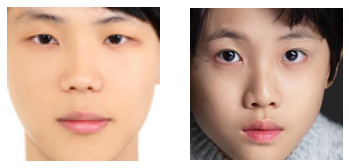

In [14]:
# check the image
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/i.jpeg'
cropped_face1 = get_gropped_face(image_path)
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/오한결.jpeg'
cropped_face2 = get_gropped_face(image_path)

fig = plt.figure()
rows = 1
cols = 2
ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(cropped_face1)
ax1.axis("off")
 
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(cropped_face2)
ax2.axis("off")
plt.show()

## 5. Viusalization
노드에서 얻을 수 있는 유명인(정치인)과 (국내)연예인, 자신의 이미지의 분포를 시각화하였다.   
결과를 보면 유명인(정치인), obama를 제외하면 비슷한 분포를 보이고    
'자신(ik_e)'는 연예인의 평균(?) 정도인 결과를 보여준다.

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 407 samples in 0.003s...
[t-SNE] Computed neighbors for 407 samples in 0.042s...
[t-SNE] Computed conditional probabilities for sample 407 / 407
[t-SNE] Mean sigma: 0.147189
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.476059
[t-SNE] KL divergence after 300 iterations: 1.542810


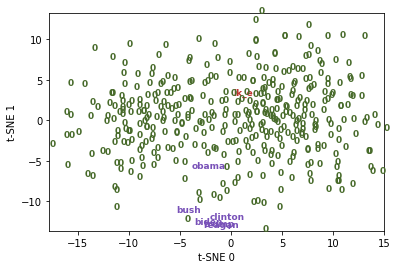

In [17]:
x_list = []
y_list = []
for k,v in embedding_dict.items():
    y_list.append(k)
    x_list.append(v)
    
# t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x_list)

colors = ['#476A2A', '#7851B8', '#BD3430', '#4A2D4E', '#875525',
               '#A83683', '#4E655E', '#853541', '#3A3120', '#535D8E']
i = 0
for k in y_list:
    c = 0
    if 'a' <= k[0] <= "z" or 'A' <= k[0] <='Z':
        c = 1
        if k[0] == 'i':
            k = 'ik_e'
            c = 2
    else:
        k = 0        
    plt.text(tsne_results[i, 0], tsne_results[i, 1], k, # x, y , 그룹
         color=colors[c], # 색상
         fontdict={'weight': 'bold', 'size':9}) # font

    i+=1

plt.xlim(tsne_results[:, 0].min(), tsne_results[:, 0].max()) # 최소, 최대
plt.ylim(tsne_results[:, 1].min(), tsne_results[:, 1].max()) # 최소, 최대
plt.xlabel('t-SNE 0') # x축 이름
plt.ylabel('t-SNE 1') # y축 이름
plt.show() # 그래프 출력

## 회고 및 루브릭 평가

### 루브릭 평가 항목
1. 얼굴임베딩 벡터를 활용해 가장 닮은 연예인 Best 5를 구할 수 있다.(닮은꼴 순위, 이름, 임베딩)
2. 충분한 수의 이미지에 대한 시도를 통해 매우 닮은꼴의 연예인을 찾아냈다.(다양한 탐색을 통해 본인과 임베딩 거리 0.5 이내로 닮은 연예인을 찾아냈다.)
3.  다양하고 재미있는 결과 시각화를 시도하였다.(matplotlib 등 다양한 시각화 도구를 하나 이상 이용해 재미있는 결과 시각화를 구현하였다.)

### 평가 항목에 대한 수행
1. 전체 과정을 통하여 image를 임베딩하고 닮은꼴 순위를 계산하였다.
2. 충분한 수(약 400여개) 이미지에 대해서 임베딩 거리를 측정한 결과 최소 0.32인 연예인을 찾아냈다.
3. t-SNE을 이용하여 연예인 데이터 분포에서 정치인의 상대적 위치와 자신의 위치를 시각화하는 결과를 구현하였다.

### 회고

노션에 공지된 꼭 포함이 되어야 할 점
- 이번 프로젝트에서 **어려웠던 점,**
- 프로젝트를 진행하면서 **알아낸 점** 혹은 **아직 모호한 점**.
- 루브릭 평가 지표를 맞추기 위해 **시도한 것들**.
- 만약에 루브릭 평가 관련 지표를 **달성 하지 못했을 때, 이유에 관한 추정**.
- **자기 다짐**

---
- **어려웠던 점**    
노드에서는 시각화를 하라고 했는데 구체적인 목표를 주지 않아서 아이디어를 생각하는데 오래 걸렸던 것 같다. 그리고 t-SNE를 개념만 알고 사용해 본 적이 없었는데, t-SNE를 사용하기 위해서 여러 가지 예제와 API를 문서를 참고해야 해서 오래 걸렸다.
---
- **알아낸 점**    
시각화하기 위해서 t-SNE를 사용하는 법을 배웠다.matploblib에서 한글 글씨가 깨지는 현상을 겪었는데, 찾아보니 기본 폰트가 한글을 지원하지 않아서 생기는 현상이었다. matploblib에서 제공하는 것 중에서는 한글을 지원하는 것이 없어서 새로 다운 받아서 설정을 해줘야 했다. 그래서 과감히 한글을 안 쓰는 것을 선택했다.

- **모호한 점**    
정말 임베딩 결과로 측정한 거리가 비슷한 정도를 잘 나타내는 지는 잘 모르겠다.

---
- **시도한 것들**    
저번에 노트북 교체로 인해서 ssac에서 E 노드를 먼저 보게 되었다. 그래서 슬랙에 올라온 글을 잘 보면 미리 E 노드에 대한 정보를 얻을 수 있는데, 이걸 이용해서 미리 ssac에서 모은 데이터를 쉽게 가져올 수 있었다. 그리고 t-SNE를 이용하여 데이터의 분포를 시각화하였다. 그리고 얼굴 인식이 불가능한 몇몇 이미지 때문에 기존의 함수에서 예외처리를 해줬다. 

---
- **우브릭 평가 관련 지표**   
제 예상에는 모두 달성되었다고 생각한다. 그 이유는 위에 있는 **평가 항목에 대한 수행**에 나와있다.  
- **자기 다짐** 및 **나의 생각들**      
이번 프로젝트는 딥러닝을 직접적으로 구현하는 것이 아니라 이미 구현되어 있는 모델들을 사용하는 것이라서 학습 시간을 걱정할 필요가 없었다. 다만, embedding할 때 약간 오래 걸려서 잠깐 걱정을 했다. 임베딩을 사용한 함수가 FaceNet을 사용한다. triple loss를 활용한 metric learning 기술을 사용한 것 같다. 이걸 이용해서 비슷한 정도를 측정하는 건데 솔직히 어떤 기준으로 비슷하다고 하는 건지는 잘 모르겠다.   
이번에는 직접 모델을 설계하고 평가하는 항목이 없어서 빠르게 프로젝트를 마칠 수 있었다. metric learning이랑 t-SNE의 개념만 알고 있었는데 이번 기회에 구체적인 부분도 알아두면 좋을 것 같다.